# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
Identifying students who are likely to fail the course is the classification problem because the variable to be predicted is binary(discrete). In fact the variable/label is 'passed' with two values only: 'Yes' or 'No'. Regression deals with real variable estimations. The example of regression problem could be the following: "How long the student will be studying the course."

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"


Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = len([p for p in student_data.passed if p == 'yes'])

# TODO: Calculate failing students
n_failed = n_students - n_passed

# TODO: Calculate graduation rate
grad_rate = (n_passed/float(n_students))*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    train_size = num_train,
                                                    stratify = y_all,
                                                    random_state = 3)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

y_train_rate = y_train.replace(('yes','no'), (1,0)).sum()/float(y_train.shape[0])
print 'Graduation rate for y_train: {:.2f}%'.format(y_train_rate*100)

y_test_rate = y_test.replace(('yes','no'), (1,0)).sum()/float(y_test.shape[0])
print 'Graduation rate for y_test: {:.2f}%'.format(y_test_rate*100)

Training set has 300 samples.
Testing set has 95 samples.
Graduation rate for y_train: 67.00%
Graduation rate for y_test: 67.37%


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **

**Naive Bayes** (NB) algorithm is used for classification problems. It is a popular method for such problems as  text categorization (spam detection, documents classification), medical diagnosis and face recognition. Our problem is binary classification problem (classes: passed/not passed), so NB can be considered.

Naive Bayes algorithm is based on Bayes's theorem with assumption of independence between every pair of features. As found in the *Naive Bayes Section* below, there are 7 pairs of dummy variables showing strong correlation and 2 pairs of variables showing moderate correlation. Even if not meeting 'naive' condition, generally the algorithm works well in practice.

The Naive Bayes theorem equallity is P(h|D) = P(D|h)P(h) / P(D).

Refering to our problem:

P(h|D) - probability of success/failure for a given set of features values (new student). Algorithm will decide which class the student belongs to based on maximum value of P(h|D).

P(D|h) - conditional probability of a set of features values given the student succeeds or fails. Estimated from training set. 

P(h) is the probability of success/failure estimated from dataset. Hence:

P(h1) = 0.67 - probability of graduation

P(h2) = 0.33 - probability of failure to graduate

P(D) - probability of given set of features values estimated from training set. This is the constant scaler factor which does not affect finding maximum P(h|D) and hence can be ommited.   


Let's look at its strengths and weaknesses.  
The main strengths of NB:

- it is simple: There are no parameters to tune. 

- it is fast at training and prediction: For training the model only calculates the probabilities of classes and conditional probabilities for attribute values given a class. For prediction only two values need to be calculated, namely P(h1|D) and P(h2|D).

- it can perform well on small training set. Our training set is small since there are 300 samples in it. 

- it handles lots of irrelevant features well (separates signal from noise) which is useful when given multidimensional training set. Our training set is multidimensional as there are 48 features.

The main weakness is inabilty to learn intercations between features. Since it does not affect classifying students, this weakness is disregarded. 

Considering all points mentioned above, NB is a good candidate to be applied. 


**Support Vector Machine** - one of the most popular machine learning algorithms used for classification and regression.  

Advantages:

- it predicts with high accuracy

- it is effective in high-dimensional spaces

- it is memory efficient 

- it is versatile: different kernel functions can be applied

Disadvantages:

- if number of features is much greater than number of samples than performance is poor. It is not the case for our problem

- not as fast as its rivals in terms of training and prediction, but due to small dataset it is not the issue

SVM is a good candidate due to its performance, no restrictions come from daaset.

**Decision Tree** (DT) is an algorithm used for classification and regression problems. As mentioned, our problem is binary classification problem, hence we can consider using DT. 

Decision trees are used for medical diagnosis, genetics research, image recognition. 

Advantages:

- it is simple: there are no parameters to tune.

- it is fast at training and prediction

- automatically learns feature interactions


Disadvantages:

- trees easy overfit the data, but esemble methods like random forests might help

- does not perform well on small datasets

- does not handle irrelevant features well 

Although our dataset is small and multidimensional, it is worth applying decision tree algorithm to the problem due to its simplicity and high speed of training and prediction. Also, DT is capable to provide the rules of classification or factors that are predictive of student performance.

In [7]:
# *Naive Bayes Section results used in the answer above.

# find all features pairs for which Rsq > 0.5

r2 = []
for col in range(X_train.shape[1]-1):
    first = list(X_train.iloc[:,col])
    for col2 in range(col+1, X_train.shape[1]):
        second = list(X_train.iloc[:,col2])
        corr = np.corrcoef(first, second)[0,1]
        corr = round(corr,2)
        if abs(corr) > 0.5:
            r2.append((col, col2, corr))
for each in r2:
    print 'Features: ', list(X_train.columns)[each[0]],' , ',list(X_train.columns)[each[1]], \
    '\nCorrelation: ',each[2]

Features:  school_GP  ,  school_MS 
Correlation:  -1.0
Features:  sex_F  ,  sex_M 
Correlation:  -1.0
Features:  address_R  ,  address_U 
Correlation:  -1.0
Features:  famsize_GT3  ,  famsize_LE3 
Correlation:  -1.0
Features:  Pstatus_A  ,  Pstatus_T 
Correlation:  -1.0
Features:  Medu  ,  Fedu 
Correlation:  0.63
Features:  Fjob_other  ,  Fjob_services 
Correlation:  -0.68
Features:  guardian_father  ,  guardian_mother 
Correlation:  -0.81
Features:  Dalc  ,  Walc 
Correlation:  0.63


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [8]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [9]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn import svm
# from sklearn import model_B
from sklearn.naive_bayes import GaussianNB
# from skearln import model_C
from sklearn import tree

# TODO: Initialize the three models
clf_A = svm.SVC(random_state = 3)
clf_B = GaussianNB()
clf_C = tree.DecisionTreeClassifier(random_state = 3)

# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A, clf_B, clf_C]:
    print '\n{}\n'.format(clf.__class__.__name__)
    for n in [100,200,300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
        print '\n'


SVC

Training a SVC using a training set size of 100. . .
Trained model in 0.0160 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8591.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7974.


Training a SVC using a training set size of 200. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8874.
Made predictions in 0.0160 seconds.
F1 score for test set: 0.8026.


Training a SVC using a training set size of 300. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8658.
Made predictions in 0.0150 seconds.
F1 score for test set: 0.8289.



GaussianNB

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.2632.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.2857.


Training a GaussianNB using a training set size of 200. . .
Trained model 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Support Vector Machine**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |           0.0016        |          0.0000         |        0.8591    |   0.7974         |
| 200               |        0.0000           |      0.0016            |  0.8874          |   0.8026         |
| 300               |         0.0000          |       0.0015           |  0.8658          |    0.8289      |

** Classifer 2 - Naive Bayes **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0000           |    0.0000              |  0.2632         |  0.2857         |
| 200               |     0.0000             |  0.0000                 | 0.7773           |  0.6829         |
| 300               |     0.0000             |   0.0000                | 0.7592           | 0.7328          |

** Classifer 3 - Decision Tree**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100         |            0.0000       |          0.0000              |   1.0000     |   0.6441              |
| 200               |   0.0016          |    0.0000                    |  1.0000      |  0.7244                |
| 300               |   0.0000          |  0.0000                      |   1.0000     |  0.6929               |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

The student dataset is small-sized (300 samples) and multidimensional (48 features). The datset is not extremely unbalanced with 67% of 'yes's and 33% of 'no's. Hence there is no need to setup weights for classes.  

SVM proves that it is high bias/low variance algorithm. Its F1 score obtained on dataset with only 100 samples is greater than F1 obtained by Naive Bayes and Decision Trees. Also SVM generalise better than rivals as differences between training and testing accuracy are smaller than those for NB and DT. Although training time is increasing with the size of dataset, it is not significant for our small set. Naive Bayes performs relatively well when trained on set with 300 samples. Considering the simplicity of the model and fast training and prediction (t = 0.010 sec) it is a good candidate to be the best model for very large dataset. Decision Tree overfits showing poor results on testing. Peformance improves slowly with dataset growth. This makes DT to be the last in the list of models for our problem. 

SVM is choosen as the best model to proceed further as it shows the highest accuracy and low variance. If very large dataset is given then Baive Bayes could be considered due to faster training. 

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **

Support Vector Classifier (SVC) is choosen.

The SVC takes data about past students (age, gender, family etc) and uses them to create a function that draws a boundary between the students who passed and failed. This boundary is made of median line and helper lines drawn on sides. Helper lines are drawn through the closest points belonging to different classes ensuring the median line is the best one. Points on helper lines are called 'support vectors'. The distance between helper line and median line is called 'margin'. The students are represented by coloured points. The colour determines what class the student belongs to. If it is blue, student passed. If it is red, student did not passed.

<img src = "http://66.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg"
width = "300">


What if it is not easy to draw a straight line to separate points between classes? In this case SVC uses space with higher dimensions. Imagine a sheet of paper with drawn points representing students.  Transforming into higher dimensional space is like folding the sheet by pulling its corners up. SVC uses 'kernel' function to determine how to do this 'pulling'. When sheet is folded it is possible to 'cut off' its part where points with the same colour are grouped. 

<img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcQ5SylXmKpFeDwFT0C-qQ5vShphuDbVnTTEbTQkVbRpAs4kk9vL" width="300">
 

The line around this 'cut off' is marked and the sheet gets unfolded. The marked line is called 'hyperplane' which is basically the median line mentioned earlier.


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKfXWcmPqYd7b901IhKVyNangkXJPUj009zF0pidGKdRJGuN5c" width = "300">


When new student is available it is represented on the sheet as a new point. The colour of this point (belonings to one of the classes) depends on what side from a deviding line the point appears. From the illustration above, if the point is inside the circle it gets red colour meaning that student is classified as 'did not pass'. If the point is outside the circle it gets blue colour meaning that student classified as 'passed'.



### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

**GridSearch visualizaton**

GridSearch is the brute force algorithm which walks through all possible parameters combinations. But what range of parameters values to choose? There are two real value parameters, namely C and gamma. Let's plot model's scores on parameter's grids to look for an opportunity to narrow down value ranges.

Initial range for C: [0.01:1000]

Initial range for gamma: [0.01:100]

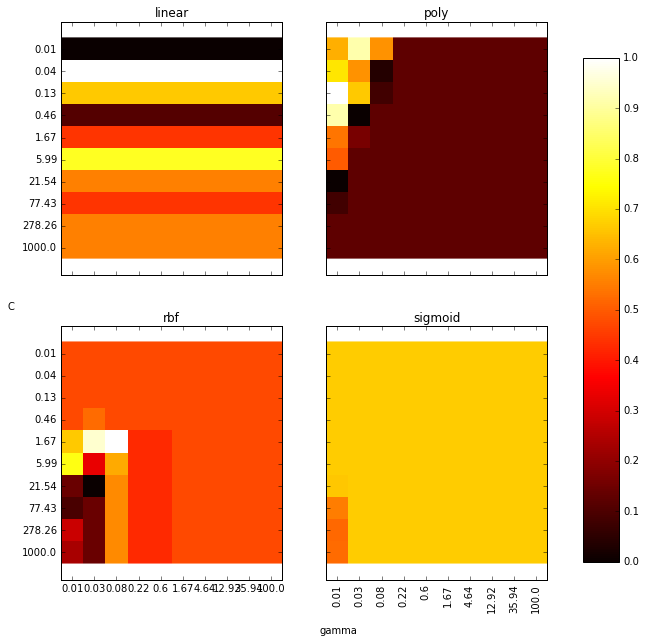

In [12]:
    # visualise GridSearch output on parameter grid

    from sklearn.grid_search import GridSearchCV
    import matplotlib.pyplot as plt
    
    %matplotlib inline
    
    C_range = [round(v,2) for v in np.logspace(-2, 3, 10)]
    gamma_range = [round(v,2) for v in np.logspace(-2, 2, 10)]
    kernel_type = [['linear'], ['poly'], ['rbf'], ['sigmoid']]
    model = svm.SVC(random_state = 3)
    X, y = X_train, y_train
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(10,10))
    
    for pos, kernels in enumerate(kernel_type):
        parameters = dict(C = C_range, gamma = gamma_range, kernel = kernels)
        
        grid = GridSearchCV(model, parameters, cv = 5)
        grid.fit(X, y)
    
        scores = [x[1] for x in grid.grid_scores_]
        scores = np.array(scores).reshape(len(C_range), len(gamma_range))
        
        if pos == 0:
            ax1.imshow(scores, interpolation='nearest', cmap = 'hot')
            ax1.set_title(kernels[0])
        elif pos == 1:
            ax2.imshow(scores, interpolation='nearest', cmap = 'hot')
            ax2.set_title(kernels[0])
        elif pos == 2:
            ax3.imshow(scores, interpolation='nearest', cmap = 'hot')
            ax3.set_title(kernels[0])
        elif pos == 3:            
            im = ax4.imshow(scores, interpolation='nearest', cmap = 'hot', vmin = 0, vmax = 1)
            ax4.set_title(kernels[0])
        
            
    fig.text(0.51, 0.05, 'gamma', ha = 'center')
    fig.text(0.05, 0.5, 'C')
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation = 90)
    plt.yticks(np.arange(len(C_range)), C_range)
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax= cbar_ax)
    
    plt.show()

**Notes on GridSearch visualization**

With help of visualization we narrow down the ranges of parameter values for each kernel function. 'Linear' kernel performs well if C is within the range of [0.01:0.13]. For 'poly' kernel, the best gamma values are within the range of [0.01:0.04], the best C values are within [0.04:0.5]. Considering 'rbf' kernel, parameters accountable for the best performance are within ranges [0.5:5] and [0.03:0.12] for C and gamma, accordingly. Sigmoid kernel shows best performance with C in [0.01:6] and gamma in [0.03:100].

**Summary: **

| Parameter | Linear     | Polynomial  | RBF         | Sigmoid    | Final Range |
| :-------: | :----:     | :--------:  | :---:       | :-----:    |             |
| C         |[0.01 : 0.13]|[0.04 : 0.5] | [0.5 : 5]   |[0.01 : 6]  | [0.01:5]    |
| gamma     |     -      |[0.01 : 0.04]|[0.03 : 0.12]|[0.03 : 100]| [0.01:0.12] |

Knowing the relevant range of parameter values reduces computational time significantly. 
Let's combine ranges into one Final Range which will fit all kernels: C [0.01:5], gamma [0.01:0.12]. Sigmoid kernel's bounds are disregarded because the method shows no difference in performance when gamma>0.03 and C < 6. Also there is no such combination of C and gamma whuch results in 'white spots' on the grid (white color indicates high performance). Thus, sigmoid kernel can be omitted from consideration. 

Now, let's find the best estimator.

In [21]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
import time as t

def tune_model(parameters):
    #start clock
    start = t.time()
    
    # TODO: Initialize the classifier
    clf = svm.SVC(random_state = 3)

    # TODO: Make an f1 scoring function using 'make_scorer' 
    f1_scorer = make_scorer(f1_score, pos_label = 'yes')

    # TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
    grid_obj = GridSearchCV(clf, parameters, cv = 5, scoring = f1_scorer)

    # TODO: Fit the grid search object to the training data and find the optimal parameters
    grid_obj.fit(X_train, y_train)

    # Get the estimator
    clf = grid_obj.best_estimator_

    # Report the final F1 score for training and testing after parameter tuning
    print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

    #stop clock
    end = t.time()
    calc_time = (end-start)/float(60)

    print '\nBest parameters:\n\t\tC: {}\n\t\tgamma: {}\n\t\tkernel: {}\
       \n\t\ttime: {: .2f} mins'.format(
    grid_obj.best_params_['C'], grid_obj.best_params_['gamma'], grid_obj.best_params_['kernel'],
    calc_time)
    

print 'Parameter list is based on Final Range.: C[0.01:5], gamma[0.01:0.12], kernel[linear, rbf, poly]'

C_range = np.linspace(0.01, 5, 100)
gamma_range = np.linspace(0.01, 0.12, 20)
degree_range = range(2,4)
kernel_type = ['linear', 'rbf', 'poly']
parameters = dict(C = C_range, gamma = gamma_range, kernel = kernel_type, degree= degree_range)
tune_model(parameters)
print '\n\n'

#loop through all kernels with each parameters range narrowed based on visualisation grid
gamma_range = [0.003]
degree_range = [1]

for kern in kernel_type:
    if kern is 'linear':
        C_range = np.linspace(0.000001, 0.13, 100)
        kernel_type = [kern]
        print 'Kernel: Linear'
    elif kern is 'rbf':
        C_range = np.linspace(0.46, 1.5, 100)
        gamma_range = np.linspace(0.000001, 0.2, 20)
        degree_range = range(2,4)
        kernel_type = [kern]
        print 'Kernel: RBF'
    elif kern is 'poly':
        C_range = np.linspace(0.04, 0.46, 100)
        gamma_range = np.linspace(0.000001, 0.03, 20)
        degree_range = range(2,4)
        kernel_type = [kern]
        print 'Kernel: Polynomial'
        
    parameters = dict(C = C_range, gamma = gamma_range, kernel = kernel_type, degree= degree_range)
    tune_model(parameters)
    print '\n\n'

Parameter list is based on Final Range.: C[0.01:5], gamma[0.01:0.12], kernel[linear, rbf, poly]
Made predictions in 0.0030 seconds.
Tuned model has a training F1 score of 0.8410.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.8219.

Best parameters:
		C: 0.060404040404
		gamma: 0.01
		kernel: linear       
		time:  65.54 mins



Kernel: Linear
Made predictions in 0.0030 seconds.
Tuned model has a training F1 score of 0.8373.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.8299.

Best parameters:
		C: 0.0577783333333
		gamma: 0.003
		kernel: linear       
		time:  0.09 mins



Kernel: RBF
Made predictions in 0.0070 seconds.
Tuned model has a training F1 score of 0.9805.
Made predictions in 0.0050 seconds.
Tuned model has a testing F1 score of 0.7973.

Best parameters:
		C: 1.45797979798
		gamma: 0.0736848421053
		kernel: rbf       
		time:  4.15 mins



Kernel: Polynomial
Made predictions in 0.0030 seconds.
Tuned model has a train

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

Tuning with Final Range did not help to improve model performance ( tuned: 0.8219 vs untuned: 0.8289). 
Visualisation suggest to use smaller regions of values which are different for each kernel function. It saves computational time (65.54 mins vs. 0.09 + 4.15 + 4.36 mins) and allows breaking search grid into smaller pieces increasing the chance to 'catch' the best value. This approach brings better F-score value of 0.8299 despite of using the same kernel function (linear) for tuning. As a result, model tuning improved its predicting performance. 

Breaking search grid further can yield in even better results, but the process is time consuming.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.